In [2]:
# Artifical Neural Network
# This Algorithm design to predict and Detect a Kidney diseases

In [3]:
# Import Libraries

from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as kr
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import Data
df = pd.read_csv(r"C:\Users\Absar\Desktop\kidney_disease.csv")

In [5]:
           # age     -   age
           # bp      -   blood pressure
           # sg      -   specific gravity
           # al      -   albumin
           # su      -   sugar
           # rbc     -   red blood cells
           # pc      -   pus cell
           # pcc     -   pus cell clumps
           # ba      -   bacteria
           # bgr     -   blood glucose random
           # bu      -   blood urea
           # sc      -   serum creatinine
           # sod     -   sodium
           # pot     -   potassium
           # hemo    -   hemoglobin
           # pcv     -   packed cell volume
           # wc      -   white blood cell count
           # rc      -   red blood cell count
           # htn     -   hypertension
           # dm      -   diabetes mellitus
           # cad     -   coronary artery disease
           # appet   -   appetite
           # pe      -   pedal edema
           # ane     -   anemia
           # class   -   class   

In [6]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [8]:
df.shape

(400, 26)

In [9]:
# create a list of column name to keep
# Kidney effect parameters
col_to_retain= ['sg','bp','al','sc','hemo','pcv','rbc','htn','appet','dm','ane','classification']

In [10]:
# Drop the column that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in col_to_retain], axis=1)

In [11]:
# Drop the rows with NaN or missing values
df = df.dropna(axis=0)

In [12]:
# Transform the non-numeric data in the columns
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [13]:
df.head()

,bp,sg,al,rbc,sc,hemo,pcv,htn,dm,appet,ane,classification
2,80.0,1.010,2.0,1,1.8,9.6,14,0,1,1,1,0
3,70.0,1.005,4.0,1,3.8,11.2,15,1,0,1,1,0
4,80.0,1.010,2.0,1,1.4,11.6,18,0,0,0,0,0
8,100.0,1.015,3.0,1,1.9,10.8,16,1,1,0,1,0
9,90.0,1.020,2.0,0,7.2,9.5,12,1,1,1,1,0


In [14]:
df.tail()

,bp,sg,al,rbc,sc,hemo,pcv,htn,dm,appet,ane,classification
395,80.0,1.020,0.0,1,0.5,15.7,30,0,0,0,0,1
396,70.0,1.025,0.0,1,1.2,16.5,37,0,0,0,0,1
397,80.0,1.020,0.0,1,0.6,15.8,32,0,0,0,0,1
398,60.0,1.025,0.0,1,1.0,14.2,34,0,0,0,0,1
399,80.0,1.025,0.0,1,1.1,15.8,36,0,0,0,0,1


In [15]:
# Blood Pressure(BP)
#Your kidneys play a key role in keeping your blood pressure in a healthy range. Diseased kidneys are less able to help regulate blood pressure. As a result, blood pressure increases. If you have kidney patient, high blood pressure makes it more likely that your kidney disease will get worse and you will have heart problems.

# Specific Gravity(SG)
#Specific gravity the proportion of the mass of an arrangement compared to the mass of a break-even with the volume of water, is a gauge of the concentration of substances broken up within the arrangement.
# Ideally, urine specific gravity results will fall between 1.002 and 1.030 if your kidneys are functioning normally. Specific gravity results above 1.010 can indicate mild dehydration.

# Albumin (AL)
#Albuminuria is a sign of kidney disease and means that you have too much albumin in your urine. Albumin is a protein found in the blood. A healthy kidney doesn't let albumin pass from the blood into the urine. A damaged kidney lets some albumin pass into the urine.

# Red Blood Cell(RBC)
#Your kidneys help your body make red blood cells. Healthy kidneys make a hormone called erythropoietin (EPO).
#The Red blood count one means 'Normal RBC'

# Serum Creatinine(SC)
#In general, however, normal creatinine levels range from 0.9 to 1.3 mg/dL in men and 0.6 to 1.1 mg/dL in women who are 18 to 60 years old. Normal levels are roughly the same for people over 60. High serum creatinine levels in the blood indicate that the kidneys aren't functioning properly.

# Hemoglobin(HEMO)
#If you have kidney disease, you should have a blood test to measure your hemoglobin level at least once a year to check for anemia. Hemoglobin is the part of red blood cells that carries oxygen throughout your body. If your hemoglobin is too low, it is likely you have anemia.

# Packed Cell Volume(PCV)
#The packed cell volume (PCV) is a measurement of the proportion of blood that is made up of cells.The measurement depends on the number and size of red blood cells. It is normally 40.7%–50.3% for males and 36.1%–44.3% for females.
#PCV is the percentage of red blood cells in circulating blood. A decreased PCV generally means red blood cell loss from any variety of reasons like cell destruction, blood loss, and failure of bone marrow production. An increased PCV generally means dehydration or an abnormal increase in red blood cell production.

# Hypertension(HTN)
#High blood pressure (hypertension) is a leading cause of kidney disease and kidney failure (end-stage renal disease). Hypertension can cause damage to the blood vessels and filters in the kidney, making removal of waste from the body difficult.
#The Hypertension zero means 'No' and one means 'Yes'

# Diabetes Mellitus(DM)
#One cause of kidney failure is diabetes mellitus, a condition characterised by high blood glucose (sugar) levels. Over time, the high levels of sugar in the blood damage the millions of tiny filtering units within each kidney. This eventually leads to kidney failure.
#The Diabetes Mellitus zero means 'No' and one means 'Yes'

# Appetite
#As chronic kidney disease progresses to end-stage renal disease, signs and symptoms might include: Nausea. Vomiting
#The Appetite zero means 'good' and one means 'poor'

# Anemia
#Your body uses iron to make red blood cells. A common cause of anemia is iron deficiency. Iron deficiency means you do not have enough iron in your body.
#The Anemia zero means 'No' and one means 'Yes'

# Classification
#The classisification zero and one show the patient condition, zero mean kidney patient and one one means no kidney patient. 

In [16]:
# Split the into independent(X) data set and dependent (y) data set is the target data 
X = df.drop(['classification'],axis=1)
y = df['classification']

In [17]:
# scaling
# Min-Max scaler function the data set so that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]= x_scaler.transform(X)

In [18]:
#  Split the data into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [34]:
# Build the model
model=kr.Sequential([
    kr.layers.Dense(60, input_dim=60, activation='relu'),
    kr.layers.Dense(30, activation='softmax')
    
])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
# Train the model 
history = model.fit(X_train,y_train, epochs=100, batch_size=X_train.shape[0])

Epoch 1/100
1/1 [==============================] - 0s 459ms/step - loss: 0.7117 - accuracy: 0.3476
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.6037
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.6037
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.6037
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.6037
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.6037
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6037
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.6646 - accuracy: 0.6037
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6037
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.6037
Epoch 11/100
1/1 [=========

In [66]:
# Train model Loss and Accuracy is given below
# Loss = 0.1626 
# Accuracy = 0.9268

In [41]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1413 - accuracy: 0.9524


[0.14129526913166046, 0.9523809552192688]

In [67]:
# Test model Loss and Accuracy is given below
# Loss = 0.1413
# Accuracy = 0.9524

In [68]:
# Compare Train and test model Accuracy and Loss
# Train Model
# Loss = 0.1626 
# Accuracy = 0.9268
# Test Model
# Loss = 0.1413
# Accuracy = 0.9524

Text(0, 0.5, 'accuracy and loss')

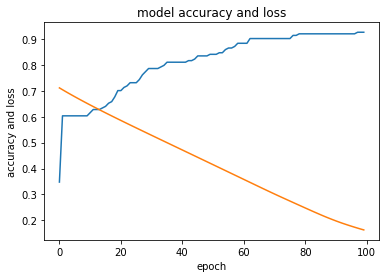

In [42]:
# Visualize the model loss and accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.xlabel('epoch')
plt.ylabel('accuracy and loss')

In [43]:
# Get the shape of the training and testing data set
print('shape of training data',X_train.shape)
print('shape of testing data',X_test.shape)

shape of training data (164, 11)
shape of testing data (42, 11)


In [44]:
# The shape of training data 164 patients and 11 columns factor impact on kidney
# The shape of tessting data 42 patients and 11 columns factor impact on kidney
# This model predicts and diagnosis kidney patient and condition

In [45]:
pred = model.predict(X_test)

In [46]:
pred

array([[0.47236532],
       [0.9532614 ],
       [0.        ],
       [0.        ],
       [0.9793194 ],
       [0.99817073],
       [0.4636423 ],
       [1.        ],
       [0.92780566],
       [0.29156893],
       [0.16761228],
       [0.97614366],
       [0.6147999 ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.97800475],
       [0.        ],
       [0.60541177],
       [0.97026086],
       [0.27418095],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.9969473 ],
       [0.97830224],
       [1.        ],
       [0.96078444],
       [1.        ],
       [0.99396884],
       [0.97373325],
       [0.9420916 ],
       [0.95595485],
       [1.        ],
       [0.92615414],
       [0.4723581 ],
       [0.9871814 ],
       [0.9973488 ],
       [0.08773941],
       [0.        ],
       [0.499264  ],
       [0.        ]], dtype=float32)

In [47]:
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

[0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0]

In [48]:
# Probabilities they are all zero's an one's so that tells us you know if the patient has kidney diesease or not.

In [49]:
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred

print('original : {0}',format(",".join(str(X)for X in y_test)))
print('predicted : {0}',format(",".join(str(X)for X in pred)))

original : {0} 0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
predicted : {0} 0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0


In [50]:
# Test the model accuracy on the test data set

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred)

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# True Negative
# True Positive
# False Negative
# False Positive

In [51]:
print(cm)
print('Model Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[15  2]
 [ 0 25]]
Model Accuracy=0.9523809523809523


In [52]:
from sklearn.metrics import plot_confusion_matrix

In [53]:
import matplotlib.pyplot as plt

In [54]:
con_mat = confusion_matrix(y_test,pred)

In [55]:
con_mat

array([[15,  2],
       [ 0, 25]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,pred)
print('Classification Report:\n',matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.93      1.00      0.96        25

    accuracy                           0.95        42
   macro avg       0.96      0.94      0.95        42
weighted avg       0.96      0.95      0.95        42



In [57]:
# Precision and recall are two extremely important model evaluation metrics. While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified algorithm.
# The F1-score, also called the F1-score, is a measure of a model's accuracy on a dataset.The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.
# The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.
# The harmonic mean is a type of numerical average. It is calculated by dividing the number of observations by the reciprocal of each number in the series. Thus, the harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.
# Average Macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.
# Average Weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

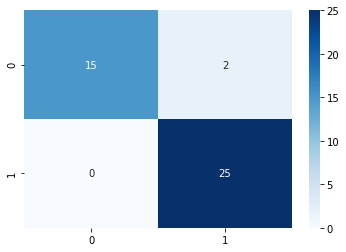

In [58]:
import seaborn as sns
sns.heatmap(con_mat,cmap="Blues", annot=True)

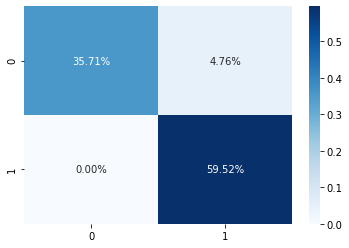

In [61]:
sns.heatmap(con_mat/np.sum(con_mat), annot=True, 
            fmt='.2%', cmap='Blues')

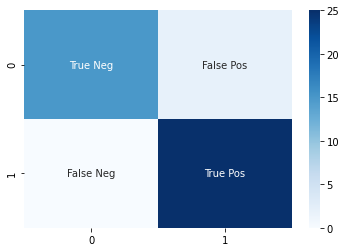

In [62]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(con_mat, annot=labels, fmt='', cmap='Blues')

In [63]:
# A true positive is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class. And a false negative is an outcome where the model incorrectly predicts the negative class.

# A false positive is an error in binary classification in which a test result incorrectly indicates the presence of a condition such as a disease when the disease is not present, while a false negative is an opposite error where the test result incorrectly fails to indicate the presence of a condition when it is

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bd76f1a4f0>)

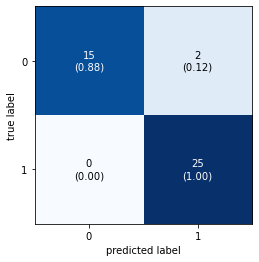

In [64]:
from mlxtend .plotting import plot_confusion_matrix
mat = confusion_matrix(y_test,pred)
plot_confusion_matrix(conf_mat=mat,show_normed=True)

In [65]:
# Save the model
model.save('Kidney Diesease')

INFO:tensorflow:Assets written to: Kidney Diesease\assets
